In [1]:
COMP_NAME = 'predict-west-nile-virus'

In [2]:
from fastai.tabular.all import *

In [3]:
WORKING_DIR = Path(".").absolute()
INPUT_DIR = Path("../input").absolute()
ARCHIVE_DIR = Path("../archive").absolute()
MODELS_DIR = Path("../models").absolute()

In [4]:
path = Path(INPUT_DIR/COMP_NAME); Path.BASE_PATH = path; path.ls()

(#18) [Path('mapdata_copyright_openstreetmap_contributors.rds'),Path('spray.csv'),Path('west_nile.zip'),Path('.DS_Store'),Path('beat_the_benchmark.csv'),Path('sampleSubmission.csv'),Path('test.csv'),Path('west_nile'),Path('mapdata_copyright_openstreetmap_contributors.txt.zip'),Path('sampleSubmission.csv.zip')...]

In [5]:
# For working locally, you want to be in west_nile_scripts/working. 
# This command will move you to there, if you're in west_nile_scripts/src (where this file is).
# %cd .. # Not necessary for scripts running on Kaggle

In [6]:
!pwd

/Users/butch/devt/workspaces/python3/fastai2_2020/fastchai_comps/predict-west-nile-virus/working


In [7]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [8]:
from fastai.tabular.all import *

In [9]:
mapdata = np.loadtxt(path/"mapdata_copyright_openstreetmap_contributors.txt")

In [10]:
mapdata.shape

(1760, 1311)

In [11]:
traps = pd.read_csv(path/'train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

In [12]:
traps.head()

,Date,Trap,Longitude,Latitude,WnvPresent
0,2007-05-29,T002,-87.800991,41.954690,0
1,2007-05-29,T002,-87.800991,41.954690,0
2,2007-05-29,T007,-87.769279,41.994991,0
3,2007-05-29,T015,-87.824812,41.974089,0
4,2007-05-29,T015,-87.824812,41.974089,0


In [13]:
traps.tail()

,Date,Trap,Longitude,Latitude,WnvPresent
10501,2013-09-26,T035,-87.742302,41.763733,1
10502,2013-09-26,T231,-87.666066,41.987280,0
10503,2013-09-26,T232,-87.668055,41.912563,0
10504,2013-09-26,T233,-87.807277,42.009876,0
10505,2013-09-26,T235,-87.627096,41.776428,0


In [14]:
traps['Date'].unique().shape

(95,)

In [15]:
traps['Trap'].unique().shape

(136,)

In [16]:
trap_locs = traps[['Trap','Longitude','Latitude']].drop_duplicates()

In [17]:
trap_locs.count()

Trap         138
Longitude    138
Latitude     138
dtype: int64

In [18]:
trap_counts = trap_locs.groupby('Trap').count()

In [19]:
trap_counts.head()

,Longitude,Latitude
Trap,,
T001,1,1
T002,1,1
T003,1,1
T004,1,1
T005,1,1


In [20]:
trap_counts[trap_counts['Longitude'] > 1]

,Longitude,Latitude
Trap,,
T009,2,2
T035,2,2


In [21]:
trap_locs[trap_locs['Trap'].isin(['T009','T035'])]

,Trap,Longitude,Latitude
50,T009,-87.812827,41.981964
389,T035,-87.677737,41.836644
3867,T009,-87.862995,41.992478
6223,T035,-87.742302,41.763733


In [22]:
traps[traps['Trap'].isin(['T035'])]

,Date,Trap,Longitude,Latitude,WnvPresent
389,2007-07-11,T035,-87.677737,41.836644,0
513,2007-07-18,T035,-87.677737,41.836644,0
561,2007-07-19,T035,-87.677737,41.836644,0
759,2007-07-27,T035,-87.677737,41.836644,0
760,2007-07-27,T035,-87.677737,41.836644,0
...,...,...,...,...,...
10288,2013-09-12,T035,-87.742302,41.763733,0
10289,2013-09-12,T035,-87.742302,41.763733,0
10405,2013-09-19,T035,-87.742302,41.763733,0
10406,2013-09-19,T035,-87.742302,41.763733,0


In [23]:
traps[traps['Trap'].isin(['T035'])]['WnvPresent'].sum()

3

In [24]:
trap_uniqlocs = traps[['Longitude','Latitude','WnvPresent']].groupby(by=['Longitude','Latitude']).sum()
trap_uniqlocs.head()

,,WnvPresent
Longitude,Latitude,
-87.930995,41.957799,10
-87.890615,41.974689,66
-87.862995,41.992478,6
-87.832763,41.944869,11
-87.824812,41.974089,4


In [25]:
trap_uniqlocs2 = traps[['Longitude','Latitude','WnvPresent']].groupby(by=['Longitude','Latitude']).count(); trap_uniqlocs2.head()

,,WnvPresent
Longitude,Latitude,
-87.930995,41.957799,140
-87.890615,41.974689,750
-87.862995,41.992478,80
-87.832763,41.944869,133
-87.824812,41.974089,35


In [26]:
(trap_uniqlocs.index.names,trap_uniqlocs2.index.names)


(FrozenList(['Longitude', 'Latitude']), FrozenList(['Longitude', 'Latitude']))

In [27]:
trap_uniqlocs['WnvPresentCount'] = trap_uniqlocs2['WnvPresent']; trap_uniqlocs.head()

,,WnvPresent,WnvPresentCount
Longitude,Latitude,,
-87.930995,41.957799,10,140
-87.890615,41.974689,66,750
-87.862995,41.992478,6,80
-87.832763,41.944869,11,133
-87.824812,41.974089,4,35


In [28]:
trap_uniqlocs.reset_index(level=trap_uniqlocs.index.names, inplace=True); trap_uniqlocs.head()

,Longitude,Latitude,WnvPresent,WnvPresentCount
0,-87.930995,41.957799,10,140
1,-87.890615,41.974689,66,750
2,-87.862995,41.992478,6,80
3,-87.832763,41.944869,11,133
4,-87.824812,41.974089,4,35


In [29]:
trap_uniqlocs[trap_uniqlocs['WnvPresentCount'] == 0].count()

Longitude          0
Latitude           0
WnvPresent         0
WnvPresentCount    0
dtype: int64

In [30]:
trap_uniqlocs['WnvPresentAvg'] = trap_uniqlocs['WnvPresent'].div(trap_uniqlocs['WnvPresentCount']); trap_uniqlocs.head()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg
0,-87.930995,41.957799,10,140,0.071429
1,-87.890615,41.974689,66,750,0.088000
2,-87.862995,41.992478,6,80,0.075000
3,-87.832763,41.944869,11,133,0.082707
4,-87.824812,41.974089,4,35,0.114286


In [31]:
trap_uniqlocs.tail()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg
133,-87.538693,41.659112,9,112,0.080357
134,-87.536497,41.702724,6,83,0.072289
135,-87.535198,41.680946,3,152,0.019737
136,-87.531657,41.717753,0,23,0.000000
137,-87.531635,41.686398,3,45,0.066667


In [32]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

In [33]:
(traps['Longitude'].min(), traps['Longitude'].max(),traps['Latitude'].min(), traps['Latitude'].max())

(-87.930995, -87.531635, 41.644612, 42.01743)

In [34]:
wnv_locations = traps[traps['WnvPresent'] > 0][['Longitude', 'Latitude']].drop_duplicates()
wnv_locations['wnv_present'] = True
wnv_locations['marker'] = 'blue'
no_wnv_locations = traps[traps['WnvPresent'] == 0][['Longitude', 'Latitude']].drop_duplicates()
no_wnv_locations['wnv_present'] = False
no_wnv_locations['marker'] = 'red'
locations = pd.concat([wnv_locations, no_wnv_locations],ignore_index=True)
locations.head()

,Longitude,Latitude,wnv_present,marker
0,-87.531635,41.686398,True,blue
1,-87.599862,41.673408,True,blue
2,-87.800991,41.954690,True,blue
3,-87.824812,41.974089,True,blue
4,-87.676709,41.688324,True,blue


In [35]:
locations.tail()

,Longitude,Latitude,wnv_present,marker
232,-87.770899,41.994679,False,red
233,-87.695443,41.738903,False,red
234,-87.707394,41.753391,False,red
235,-87.669539,41.719140,False,red
236,-87.633590,41.925652,False,red


In [36]:
uniq_wnv_locations = trap_uniqlocs[trap_uniqlocs['WnvPresent'] > 0].copy()
uniq_wnv_locations.head()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg
0,-87.930995,41.957799,10,140,0.071429
1,-87.890615,41.974689,66,750,0.088000
2,-87.862995,41.992478,6,80,0.075000
3,-87.832763,41.944869,11,133,0.082707
4,-87.824812,41.974089,4,35,0.114286


In [37]:
uniq_wnv_locations.tail()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg
131,-87.546587,41.740641,3,130,0.023077
133,-87.538693,41.659112,9,112,0.080357
134,-87.536497,41.702724,6,83,0.072289
135,-87.535198,41.680946,3,152,0.019737
137,-87.531635,41.686398,3,45,0.066667


In [38]:
uniq_wnv_locations.tail()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg
131,-87.546587,41.740641,3,130,0.023077
133,-87.538693,41.659112,9,112,0.080357
134,-87.536497,41.702724,6,83,0.072289
135,-87.535198,41.680946,3,152,0.019737
137,-87.531635,41.686398,3,45,0.066667


In [39]:
uniq_wnv_locations['wnv_present'] = True
uniq_no_wnv_locations = trap_uniqlocs[trap_uniqlocs['WnvPresent'] == 0].copy()
uniq_no_wnv_locations['wnv_present'] = False
uniq_locations = pd.concat([uniq_wnv_locations, uniq_no_wnv_locations],ignore_index=True); uniq_locations.head()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg,wnv_present
0,-87.930995,41.957799,10,140,0.071429,True
1,-87.890615,41.974689,66,750,0.088000,True
2,-87.862995,41.992478,6,80,0.075000,True
3,-87.832763,41.944869,11,133,0.082707,True
4,-87.824812,41.974089,4,35,0.114286,True


In [40]:
# uniq_locations['WnvPresentSquared'] = uniq_locations['WnvPresent'].pow(2)

In [41]:
uniq_locations.head()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg,wnv_present
0,-87.930995,41.957799,10,140,0.071429,True
1,-87.890615,41.974689,66,750,0.088000,True
2,-87.862995,41.992478,6,80,0.075000,True
3,-87.832763,41.944869,11,133,0.082707,True
4,-87.824812,41.974089,4,35,0.114286,True


In [42]:
uniq_locations.tail()

,Longitude,Latitude,WnvPresent,WnvPresentCount,WnvPresentAvg,wnv_present
133,-87.611560,41.891126,0,29,0.0,False
134,-87.585487,41.799282,0,20,0.0,False
135,-87.555510,41.733643,0,46,0.0,False
136,-87.543067,41.737052,0,21,0.0,False
137,-87.531657,41.717753,0,23,0.0,False


In [43]:
station1 = (41.995,-87.933)
station2 = (41.786,-87.752)
stations = {1:[41.995,-87.933], 2:[41.786,-87.752]}

In [44]:
station = pd.DataFrame(data={
                'Station':[1,2],
                'Latitude':[station1[0],station2[0]],
                'Longitude':[station1[1],station2[1]]
                               },
                       index=['station1','station2']
                         )

In [45]:
station

,Station,Latitude,Longitude
station1,1,41.995,-87.933
station2,2,41.786,-87.752


In [62]:
spray_df = pd.read_csv(path/'spray.csv'); spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [64]:
spray_uniqlocs = spray_df[['Longitude','Latitude','Date']].groupby(by=['Longitude','Latitude']).count(); spray_uniqlocs.head()

,,Date
Longitude,Latitude,
-88.096468,42.391238,1
-88.096447,42.393193,1
-88.096445,42.392838,1
-88.096443,42.390335,1
-88.096440,42.390642,1


In [66]:
spray_uniqlocs.head()

,,Date
Longitude,Latitude,
-88.096468,42.391238,1
-88.096447,42.393193,1
-88.096445,42.392838,1
-88.096443,42.390335,1
-88.096440,42.390642,1


In [67]:
spray_uniqlocs.reset_index(level=spray_uniqlocs.index.names, inplace=True); spray_uniqlocs.head()

,Longitude,Latitude,Date
0,-88.096468,42.391238,1
1,-88.096447,42.393193,1
2,-88.096445,42.392838,1
3,-88.096443,42.390335,1
4,-88.096440,42.390642,1


In [80]:
spray_uniqlocs.tail()

,Longitude,Latitude,Date
14289,-87.586792,41.726472,1
14290,-87.586787,41.725925,1
14291,-87.586775,41.725448,1
14292,-87.586755,41.724917,1
14293,-87.586727,41.724485,1


In [68]:
spray_uniqlocs['Date'].unique()

array([  1, 541,   2])

In [69]:
spray_uniqlocs[spray_uniqlocs['Date'] == 541].count()

Longitude    1
Latitude     1
Date         1
dtype: int64

In [70]:
spray_uniqlocs[spray_uniqlocs['Date'] == 2].count()

Longitude    1
Latitude     1
Date         1
dtype: int64

In [71]:
spray_uniqlocs[spray_uniqlocs['Date'] == 1].count()

Longitude    14292
Latitude     14292
Date         14292
dtype: int64

In [81]:
# lon_lat_box = (-88, -87.5, 41.6, 42.1)
spray_uniqlocs[spray_uniqlocs['Longitude'] < -88].count()

Longitude    95
Latitude     95
Date         95
dtype: int64

In [82]:
spray_uniqlocs[spray_uniqlocs['Longitude'] > -87.5].count()

Longitude    0
Latitude     0
Date         0
dtype: int64

In [87]:
spray_uniqlocs_out = spray_uniqlocs[spray_uniqlocs['Latitude'] > 42.1].count()

In [85]:
spray_uniqlocs = spray_uniqlocs[spray_uniqlocs['Latitude'] <= 42.1]

In [86]:
spray_uniqlocs[spray_uniqlocs['Latitude'] < 41.6].count()

Longitude    0
Latitude     0
Date         0
dtype: int64

In [ ]:
show_traps = True
show_station = True
show_spray = True

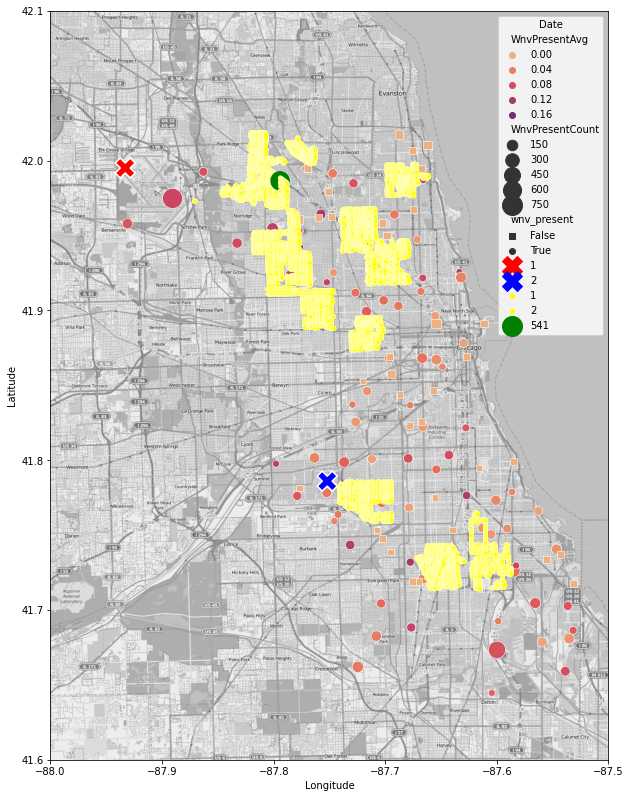

In [92]:
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

sns.scatterplot(data=uniq_locations,x='Longitude',y='Latitude',
                style='wnv_present',
                hue='WnvPresentAvg',size='WnvPresentCount',
                markers={False:'s',True:'o'},
                #palette="ch:r=-.5,l=.75",
                palette=sns.color_palette("flare", as_cmap=True),
                sizes=(40,400))
sns.scatterplot(data=station, x='Longitude',y='Latitude', hue='Station',size='Station', style='Station',palette={1:'red',2:'blue'}, markers={1:'X',2:'X'}, sizes={1:400,2:400})

sns.scatterplot(data=spray_uniqlocs,x='Longitude',y='Latitude',size='Date',sizes={1:20,2:20,541:400},style='Date',markers={1:'o',2:'o',541:'o'}, hue='Date',palette={1:'yellow',2:'yellow',541:'green'})
# sns.scatterplot(data=locations,x='Longitude',y='Latitude', hue='marker')
# locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
# plt.scatter(no_wnv_locations[:,0], no_wnv_locations[:,1], marker='o')
# plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='x')
# plt.scatter(locations[:,0], locations[:,1], marker='x');

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

In [ ]:
#plt.savefig('heatmap.png')

**Some Notes**

This plots the location of the traps in the train data, background map using the map data provided.

* `wnv_present` (True/False) - True if there is a sample for that location where WnvPresent at least once, False otherwise (`circle` - WnvPresent, `square` - WnvPresent has never been detected.)

* `WnvPresentAvg` (percentage) - indicates the percentage of the samples where WnvPresent is True -- the darker the higher the percentage.

* `WnvPresentCount` (number)- indicates the sampling frequency, ie. number of times the location was sampled -- the bigger the area, the more frequent the sampling.
* `Station` (Big X) - red - Station 1 - blue - Station 2

* `Spray` - Yellow - sprayed area 1-2 times (mostly 1) - Green - 541 Times